In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from covid import Covid
import matplotlib.pyplot as plt

In [4]:
source = ['john_hopkins','worldometers']

In [5]:
cd = Covid(source[0])
data = cd.get_data()
df = pd.DataFrame(data)
df[0:10]

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,182,US,45924891,None,745384,None,40.000000,-100.000000,1635596527000
1,80,India,34260470,None,457740,None,20.593684,78.962880,1635596527000
2,24,Brazil,21793401,None,607462,None,-14.235000,-51.925300,1635596527000
3,186,United Kingdom,9021716,None,140815,None,55.000000,-3.000000,1635596527000
4,145,Russia,8338053,None,233063,None,61.524000,105.318800,1635596527000
5,181,Turkey,7985914,None,70207,None,38.963700,35.243300,1635596527000
6,63,France,7254818,None,118590,None,46.227600,2.213700,1635596527000
7,82,Iran,5916211,None,126126,None,32.427908,53.688046,1635596527000
8,7,Argentina,5287447,None,115935,None,-38.416100,-63.616700,1635596527000
9,165,Spain,5011148,None,87368,None,40.463667,-3.749220,1635596527000


In [6]:
cd = Covid(source[1])
data = cd.get_data()
df = pd.DataFrame(data)
df[0:10]

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,North America,56182770,56182770,4328,1146961,325,44804890,10230919,10230919,19587,0,0,0,0,0
1,Asia,79221056,79221056,35632,1169086,861,76278886,1773084,1773084,26910,0,0,0,0,0
2,South America,38387664,38387664,0,1169957,0,36548106,669601,669601,12328,0,0,0,0,0
3,Europe,64235406,64235406,133295,1299389,2401,57872831,5063186,5063186,13195,0,0,0,0,0
4,Africa,8567137,8567137,282,218522,8,7902779,445836,445836,2264,0,0,0,0,0
5,Oceania,308526,308526,1789,3699,14,251921,52906,52906,324,0,0,0,0,0
6,0,721,721,0,15,0,706,0,0,0,0,0,0,0,0
7,World,246903280,246903280,175326,5007629,3609,223660119,18235532,18235532,74608,0,0,31675,642.4,0
8,USA,46771979,46771979,0,765722,0,36646900,9359357,9359357,12716,697847798,0,140214,2296,333574837
9,India,34260470,34260470,751,457773,0,33641175,161522,161522,8944,607062619,0,24507,327,1397976093


array([<AxesSubplot:title={'center':'World'}>], dtype=object)

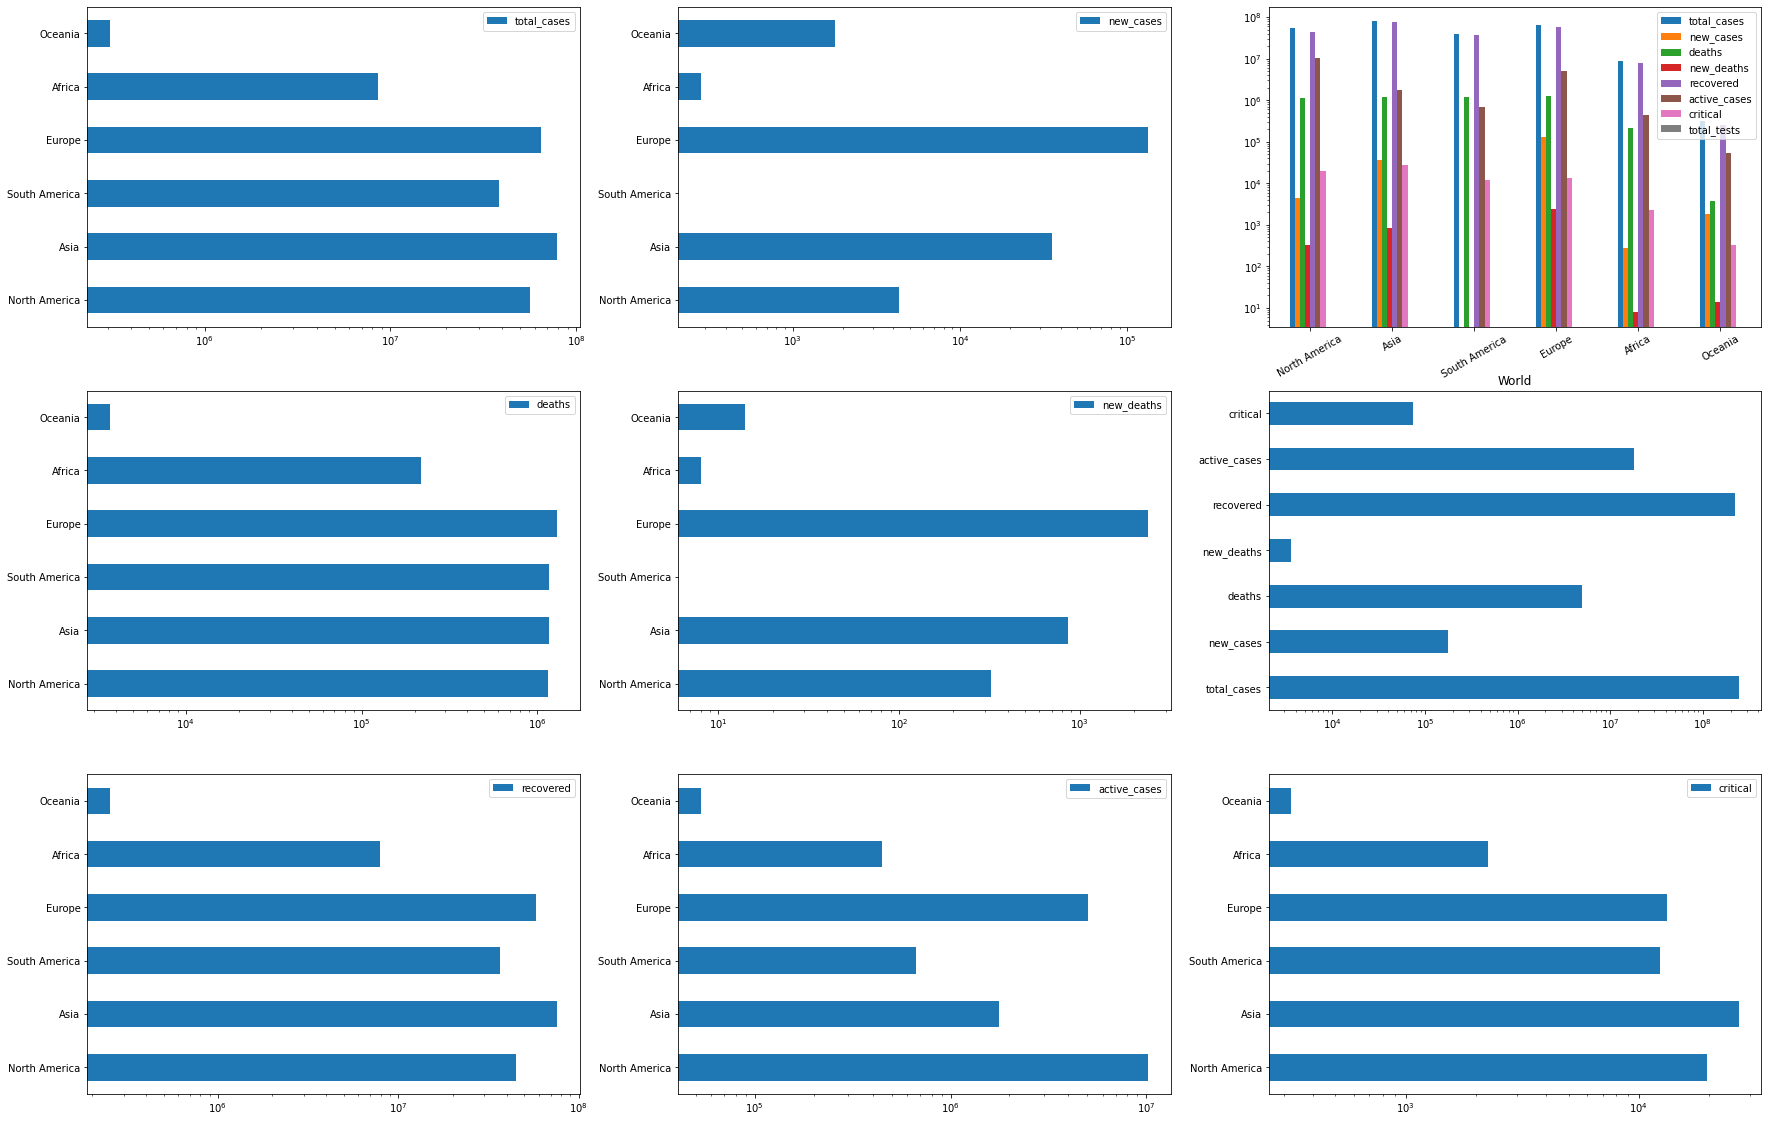

In [7]:
df_w = df[0:6][['country','total_cases','new_cases','deaths','new_deaths','recovered','active_cases','critical','total_tests']]
fig,axs = plt.subplots(nrows=3,ncols=3,figsize = [30,20],sharey=False)
df_w.plot(kind='bar',ax =axs[0,2],x='country',logy=True,stacked=False,xlabel='',rot=30)
# plt.setp(axs[0,2].get_xticklabels(),rotation=30,ha='right')
df_w[['total_cases','country']].plot(ax=axs[0,0],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['new_cases','country']].plot(ax=axs[0,1],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['deaths','country']].plot(ax=axs[1,0],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['new_deaths','country']].plot(ax=axs[1,1],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['recovered','country']].plot(ax=axs[2,0],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['active_cases','country']].plot(ax=axs[2,1],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['critical','country']].plot(ax=axs[2,2],kind ='barh',x = 'country',xlabel='',logx=True)
k=pd.DataFrame(df.loc[7][['total_cases','new_cases','deaths','new_deaths','recovered','active_cases','critical']])
k.plot(kind='barh',subplots=True,ax=axs[1,2],title ={'World'},legend=False,logx=True)

In [8]:
df_c = df.drop(columns=['confirmed','active','total_tests_per_million'])[8:]
df_c['population']=df_c['population'].astype(int)
df_c['total_cases_per_million']=df_c['total_cases_per_million'].astype(int)
df_c['total_deaths_per_million']=df_c['total_deaths_per_million'].astype(int)
pop_sort= df_c.sort_values('population',ascending=False)[0:10]# Top 10 countries sorted by population
cases_sort = df_c.sort_values('total_cases',ascending=False)[0:10]# Top 10 countries sorted by  Covid cases
death_sort = df_c.sort_values('deaths',ascending=False)[['deaths','country']][0:10]# Top 10 countries sorted by Deaths
cases_per_mil= df_c.sort_values('total_cases_per_million',ascending=False)[0:10]# Top 10 countries sorted by Cases density (Cases per million)
newcase_sort = df_c.sort_values('new_cases',ascending=False)[0:10]# Top 10 countries sorted by new cases
# Resetting the index.
pop_sort.reset_index(inplace = True,drop = True)
cases_sort.reset_index(inplace = True,drop = True)
death_sort.reset_index(inplace = True,drop = True)
newcase_sort.reset_index(inplace = True,drop = True)
cases_per_mil.reset_index(inplace=True,drop=True)
pop_sort
# df_c
# cases_sort
# cases_per_mil
# death_sort

,country,total_cases,new_cases,deaths,new_deaths,recovered,active_cases,critical,total_tests,total_cases_per_million,total_deaths_per_million,population
0,China,97080,78,4636,0,91681,763,39,160000000,67,3,1439323776
1,India,34260470,751,457773,0,33641175,161522,8944,607062619,24507,327,1397976093
2,USA,46771979,0,765722,0,36646900,9359357,12716,697847798,140214,2296,333574837
3,Indonesia,4243835,620,143388,27,4088138,12309,0,46545402,15301,517,277354458
4,Pakistan,1272345,658,28439,8,1220941,22965,1364,20750978,5616,126,226566346
5,Brazil,21793401,0,607504,0,20986901,198996,8318,63776166,101572,2831,214561469
6,Nigeria,211798,0,2895,0,202962,5941,11,3298966,995,14,212893081
7,Bangladesh,1569328,166,27862,8,1533147,8319,1376,10332644,9405,167,166862699
8,Russia,8472797,40251,237380,1160,7331424,903993,2300,206300000,58026,1626,146017429
9,Mexico,3802287,4001,287951,320,3163121,351215,4798,11323003,29086,2203,130726937


<AxesSubplot:title={'center':'India'}>

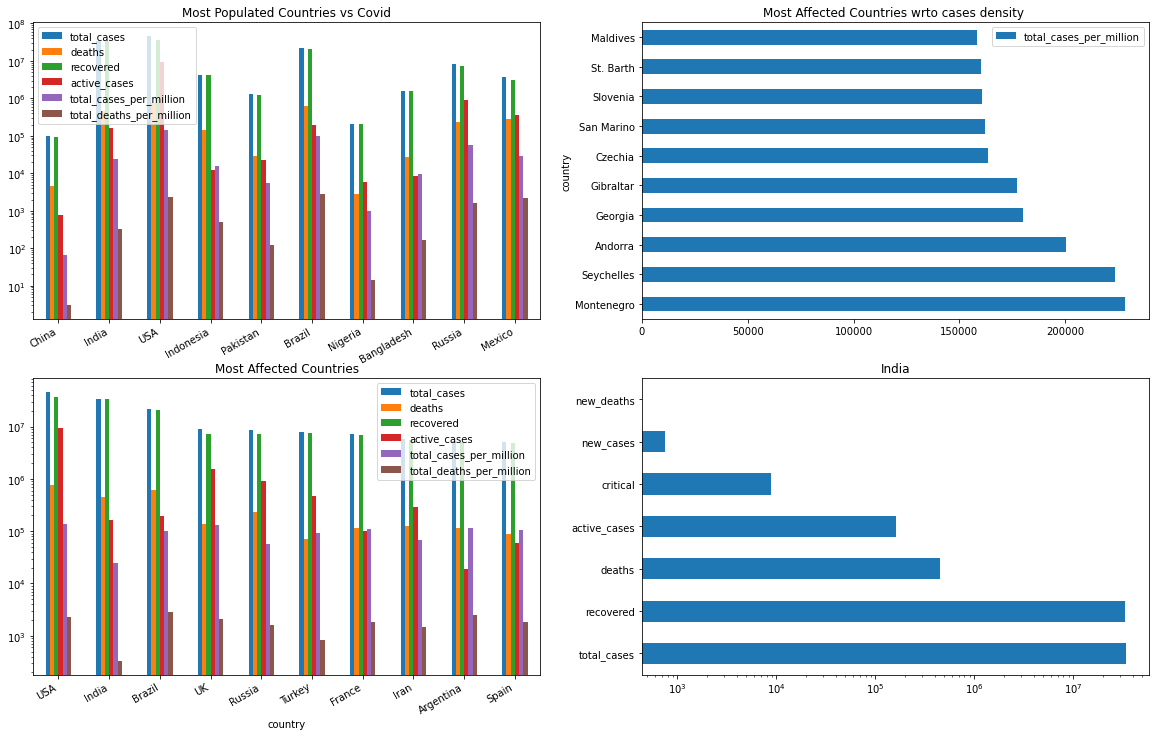

In [9]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize = [20,12],sharey=False)

pop_sort.drop(columns=['new_cases','new_deaths','critical','total_tests','population']).plot(kind='bar',x ='country',ax=axs[0,0],title = 'Most Populated Countries vs Covid',logy=True,xlabel='')
cases_sort.drop(columns=['new_cases','new_deaths','critical','total_tests','population']).plot(kind='bar',x ='country',ax=axs[1,0],title = 'Most Affected Countries',logy=True)

plt.setp(axs[0,0].get_xticklabels() + axs[1,0].get_xticklabels(), rotation=30, ha='right')

cases_per_mil['total_cases_per_million']=cases_per_mil['total_cases_per_million'].astype(float,copy=False)
cases_per_mil[['country','total_cases_per_million']].plot(x='country',kind='barh',ax=axs[0,1],title = 'Most Affected Countries wrto cases density ')

ind=pd.DataFrame(pop_sort.loc[1][['total_cases','recovered','deaths','active_cases','critical','new_cases','new_deaths']])
ind.plot(kind='barh',subplots=False,title = 'India',legend=False,ax=axs[1,1],sharex=False,logx=True,sort_columns=True)


C:\Users\KHADGA~1\AppData\Local\Temp/ipykernel_15532/3920270438.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i]//2,y[i], ha = 'center',


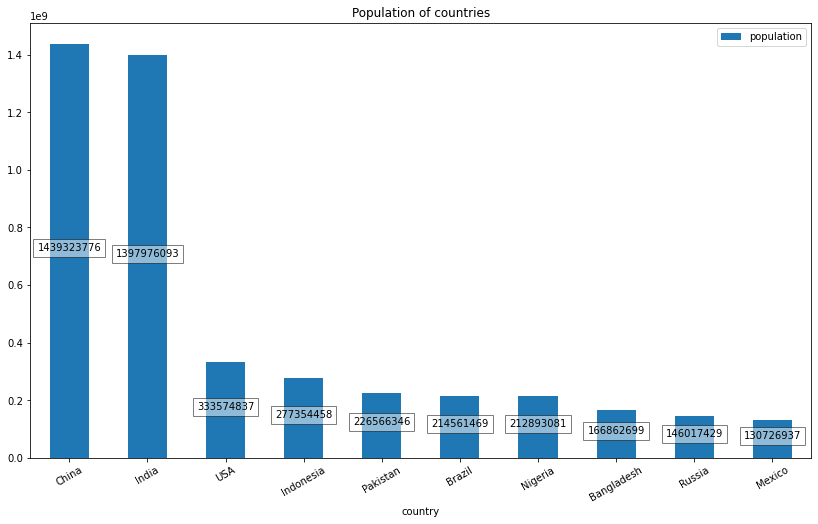

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))
pop_sort[['population','country']].plot(kind='bar',x='country',figsize=[14,8],logx=False,rot=30,title='Population of countries')
addlabels(pop_sort['country'],pop_sort['population'])


<AxesSubplot:ylabel='country'>

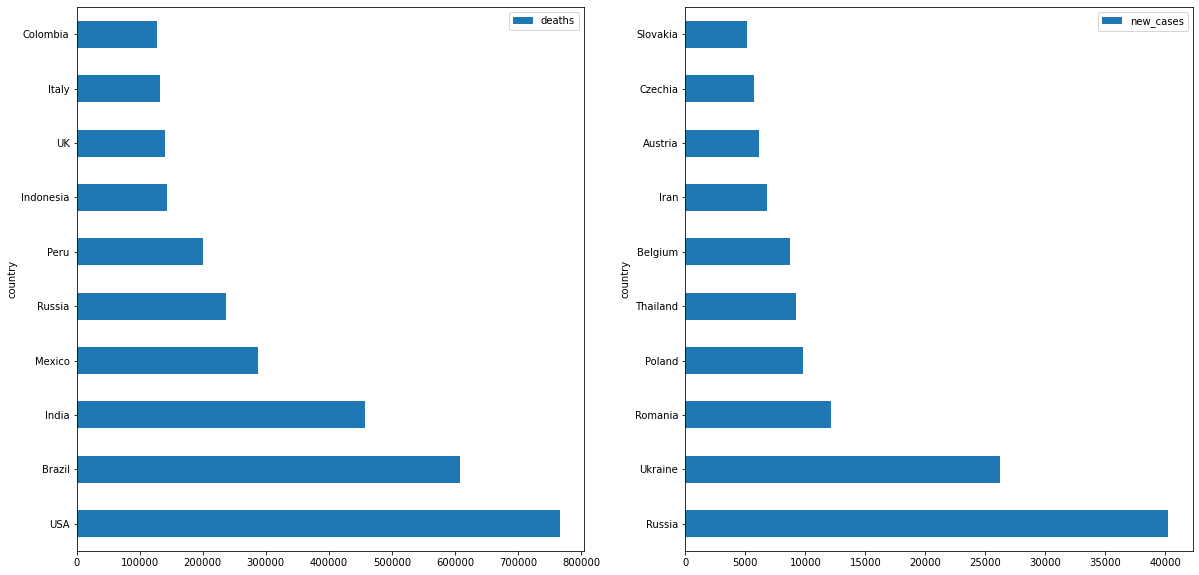

In [10]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=[20,10])
death_sort.plot(kind='barh',x='country',ax=axs[0])
newcase_sort[['new_cases','country']].plot(kind='barh',x='country',ax=axs[1])  